<ipython-input-1-748a25304c20>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')


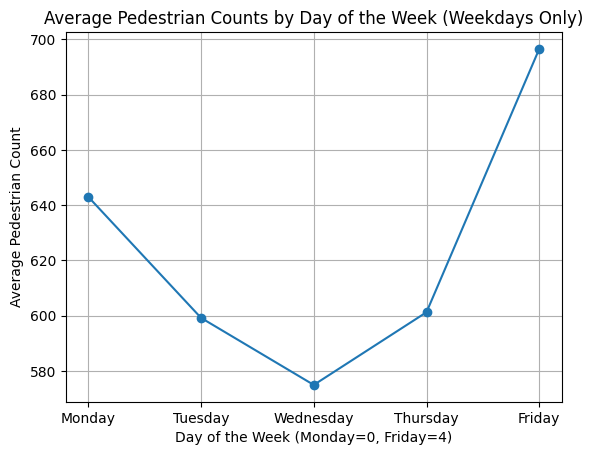

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')

df['DayOfWeek'] = df['hour_beginning'].dt.dayofweek

df_weekdays = df[df['DayOfWeek'] < 5]

weekday_counts = df_weekdays.groupby('DayOfWeek')['Pedestrians'].mean()

# Plotting the result
plt.figure()
plt.plot(weekday_counts.index, weekday_counts.values, marker='o')
plt.title('Average Pedestrian Counts by Day of the Week (Weekdays Only)')
plt.xlabel('Day of the Week (Monday=0, Friday=4)')
plt.ylabel('Average Pedestrian Count')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.grid(True)
plt.show()

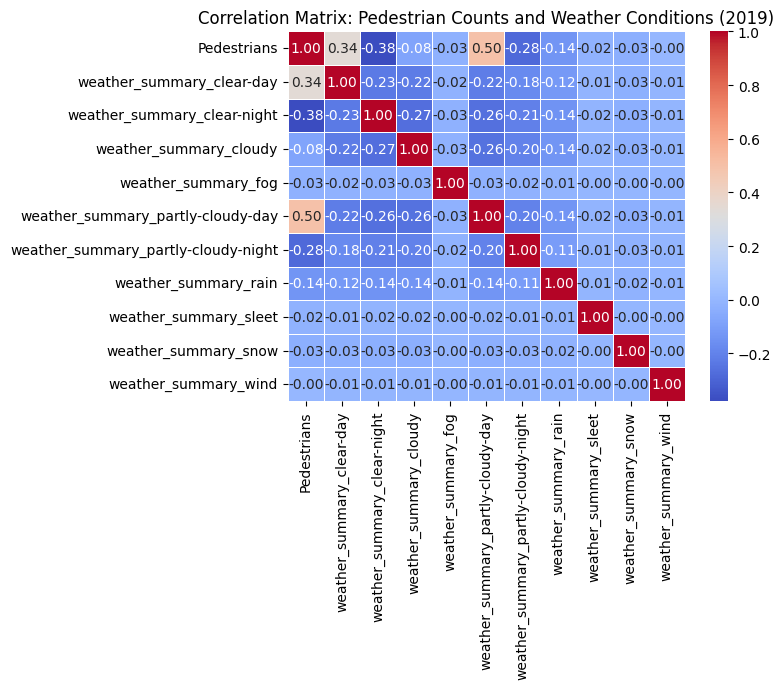

In [2]:
df_2019 = df[df['hour_beginning'].dt.year == 2019]

df_2019_encoded = pd.get_dummies(df_2019, columns=['weather_summary'])

correlation_matrix = df_2019_encoded[['Pedestrians'] + [col for col in df_2019_encoded.columns if 'weather_summary_' in col]].corr()

import seaborn as sns
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Pedestrian Counts and Weather Conditions (2019)')
plt.show()


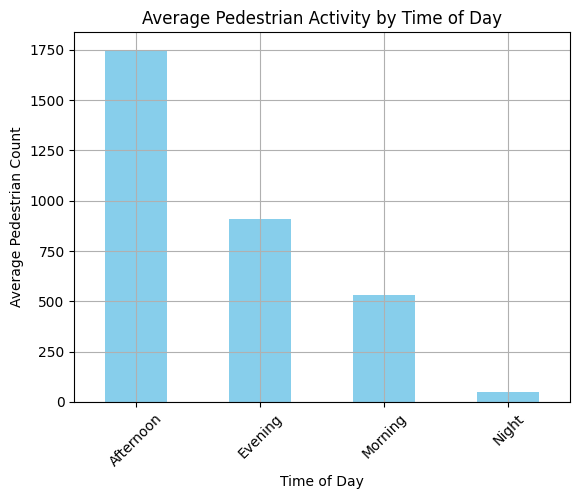

In [3]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)

pedestrian_activity_by_time_of_day = df.groupby('TimeOfDay')['Pedestrians'].mean()

plt.figure()
pedestrian_activity_by_time_of_day.plot(kind='bar', color='skyblue')
plt.title('Average Pedestrian Activity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()